In [26]:
import seaborn as sns # visualization
import math as m 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r"C:\Users\kimoa\Desktop\Programms\BRCA.csv")
print("Dataset size")
print(cl("Rows {} Columns {}".format(df.shape[0], df.shape[1]), attrs = ['bold'], color = 'black'))
df.head()

Dataset size
Rows 341 Columns 16


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [28]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
Patient_ID,object
Age,float64
Gender,object
Protein1,float64
Protein2,float64
Protein3,float64
Protein4,float64
Tumour_Stage,object
Histology,object
ER status,object


In [29]:
df.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient_ID,334.0,334,TCGA-D8-A1XD,1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000
Age,334.0,0,0,0,58.886228,12.961212,29.00000,49.000000,58.000000,68.000000,90.0000
Gender,334.0,2,FEMALE,330,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000
Protein1,334.0,0,0,0,-0.029991,0.563588,-2.34090,-0.358888,0.006129,0.343598,1.5936
Protein2,334.0,0,0,0,0.946896,0.911637,-0.97873,0.362173,0.992805,1.627900,3.4022
Protein3,334.0,0,0,0,-0.090204,0.585175,-1.62740,-0.513748,-0.173180,0.278353,2.1934
Protein4,334.0,0,0,0,0.009819,0.629055,-2.02550,-0.377090,0.041768,0.425630,1.6299
Tumour_Stage,334.0,3,II,189,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000
Histology,334.0,3,Infiltrating Ductal Carcinoma,233,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000
ER status,334.0,1,Positive,334,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000


In [30]:
pd.DataFrame(df.info()).rename(columns = {0:'Index',1:'dtype',2:'See Null',3:'Dtype'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

""


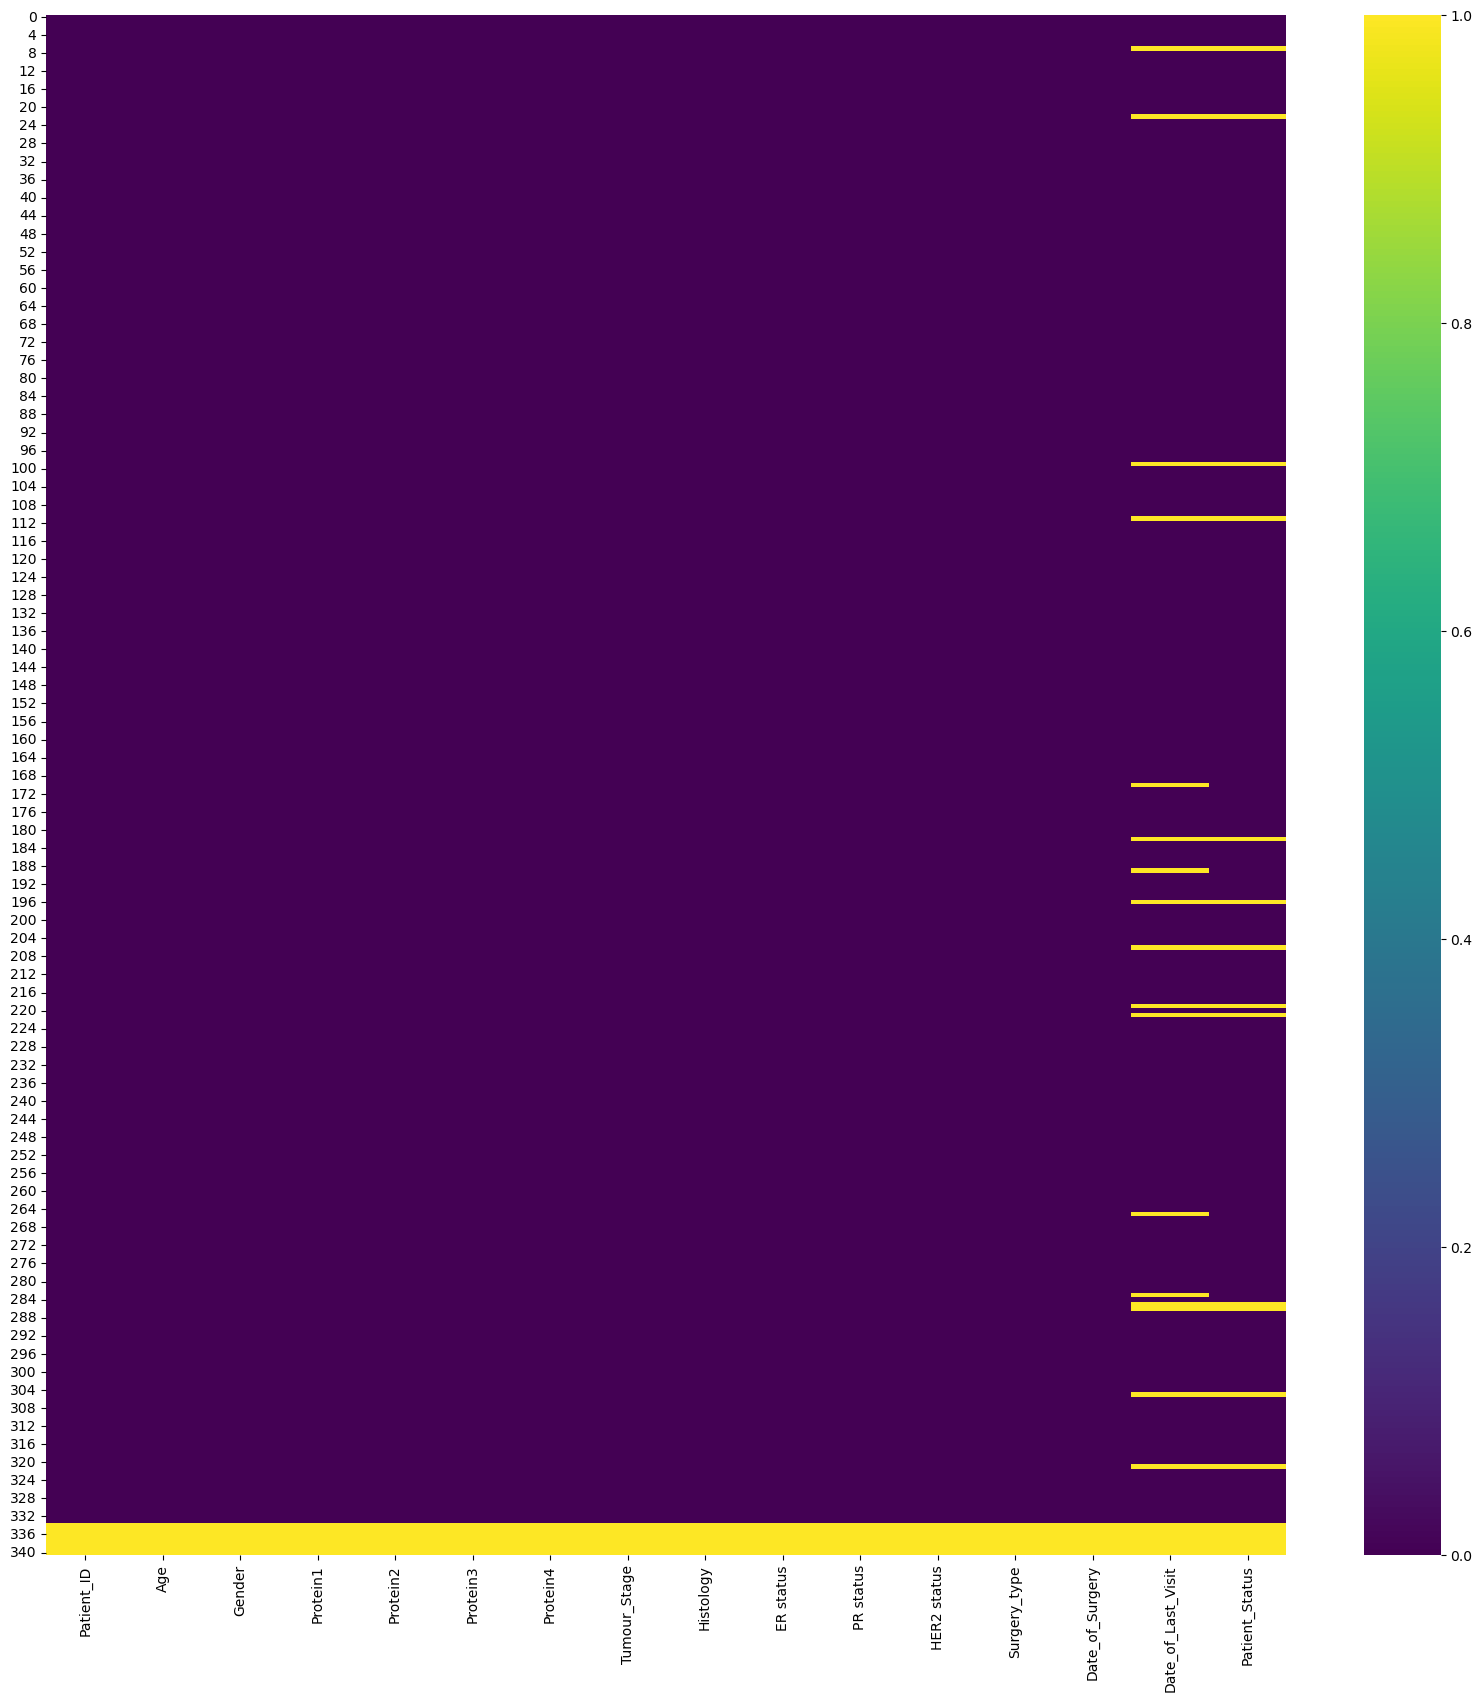

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [32]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
Patient_ID,7
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
ER status,7


In [33]:
df.duplicated().sum()

6

In [34]:
df.drop_duplicates(keep = "first",inplace = True)

In [35]:
null = []
for col in df :
    for i in range(len(df[col])) :
        if str(df[col][i]) == 'nan':
            null.append(1)
    print(f'column is {col}',len(null))

column is Patient_ID 1
column is Age 2
column is Gender 3
column is Protein1 4
column is Protein2 5
column is Protein3 6
column is Protein4 7
column is Tumour_Stage 8
column is Histology 9
column is ER status 10
column is PR status 11
column is HER2 status 12
column is Surgery_type 13
column is Date_of_Surgery 14
column is Date_of_Last_Visit 32
column is Patient_Status 46


In [36]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
mode = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
imputer = KNNImputer(n_neighbors = 3)
for col in df:
    print('number of null {} in {}'.format(df[col].isna().sum(),col))
    if df[col].dtype=='object':
        df[col] = mode.fit_transform(df[[col]])
        
    else:
        df[col] = imputer.fit_transform(df[[col]])
    print('number of null {} in {}'.format(df[col].isna().sum(),col))
    print('########' * 30)

number of null 1 in Patient_ID
number of null 0 in Patient_ID
################################################################################################################################################################################################################################################
number of null 1 in Age
number of null 0 in Age
################################################################################################################################################################################################################################################
number of null 1 in Gender
number of null 0 in Gender
################################################################################################################################################################################################################################################
number of null 1 in Protein1
number of null 0 in Protein1
#######################################################

In [37]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [38]:
df['Patient_Status'].value_counts() * 100 / len(df)

Alive    80.298507
Dead     19.701493
Name: Patient_Status, dtype: float64

In [39]:
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'],errors = 'coerce')
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'],errors = 'coerce')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead


In [40]:
df['start_year'] = df['Date_of_Surgery'].dt.year
df['start_month'] = df['Date_of_Surgery'].dt.month
df['start_day'] = df['Date_of_Surgery'].dt.day
df['end_year'] = df['Date_of_Last_Visit'].dt.year
df['end_month'] = df['Date_of_Last_Visit'].dt.month
df['end_day'] = df['Date_of_Last_Visit'].dt.day
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,...,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,start_year,start_month,start_day,end_year,end_month,end_day
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,...,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,2017,1,15,2017,6,19
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,...,Lumpectomy,2017-04-26,2018-11-09,Dead,2017,4,26,2018,11,9
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,...,Other,2017-09-08,2018-06-09,Alive,2017,9,8,2018,6,9
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,...,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,2017,1,25,2017,7,12
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,...,Other,2017-05-06,2019-06-27,Dead,2017,5,6,2019,6,27


In [41]:
df.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis = 1,inplace = True)
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,start_year,start_month,start_day,end_year,end_month,end_day
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,2017,1,15,2017,6,19
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead,2017,4,26,2018,11,9
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,2017,9,8,2018,6,9
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,2017,1,25,2017,7,12
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,2017,5,6,2019,6,27


In [42]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values)) 
        df[col] = lbl.transform(list(df[col].values))
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,start_year,start_month,start_day,end_year,end_month,end_day
0,244,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,0,0,1,0,2017,1,15,2017,6,19
1,297,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,0,0,1,2017,4,26,2018,11,9
2,56,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,0,0,2,0,2017,9,8,2018,6,9
3,247,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,0,0,1,0,2017,1,25,2017,7,12
4,164,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,0,0,2,1,2017,5,6,2019,6,27


In [43]:
feature_df = feature_df = list(df.columns)
feature_df.remove('Patient_Status')
x = np.asarray(df[feature_df])
y = np.asarray(df['Patient_Status'])
x

array([[2.44000000e+02, 3.60000000e+01, 0.00000000e+00, ...,
        2.01700000e+03, 6.00000000e+00, 1.90000000e+01],
       [2.97000000e+02, 4.30000000e+01, 0.00000000e+00, ...,
        2.01800000e+03, 1.10000000e+01, 9.00000000e+00],
       [5.60000000e+01, 6.90000000e+01, 0.00000000e+00, ...,
        2.01800000e+03, 6.00000000e+00, 9.00000000e+00],
       ...,
       [1.80000000e+01, 7.90000000e+01, 0.00000000e+00, ...,
        2.02100000e+03, 2.00000000e+00, 1.90000000e+01],
       [1.54000000e+02, 7.60000000e+01, 0.00000000e+00, ...,
        2.02100000e+03, 1.00000000e+00, 5.00000000e+00],
       [0.00000000e+00, 5.88862275e+01, 0.00000000e+00, ...,
        2.02100000e+03, 2.00000000e+00, 3.00000000e+00]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
print(cl('X_train shape : {} Rows : {} Columns : {}'.format(x_train.shape,x_train.shape[0],x_train.shape[1]), attrs = ['bold'], color = 'black'))
print(cl('X_test shape  : {} Rows : {} Columns : {}'.format(x_test.shape,x_test.shape[0],x_test.shape[1]), attrs = ['bold'], color = 'black'))
print(cl('y_train shape : {}    Rows : {} Columns : 1'.format(y_train.shape,y_train.shape[0]), attrs = ['bold'], color = 'black'))
print(cl('y_test shape  : {}    Rows : {} Columns : 1'.format(y_test.shape,y_test.shape[0]), attrs = ['bold'], color = 'black'))

print(cl('X_train samples : ', attrs = ['bold']), x_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), x_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])

print('###'*30)
print(cl('X_train samples : ', attrs = ['bold']), x_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), x_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])

X_train shape : (251, 19) Rows : 251 Columns : 19
X_test shape  : (84, 19) Rows : 84 Columns : 19
y_train shape : (251,)    Rows : 251 Columns : 1
y_test shape  : (84,)    Rows : 84 Columns : 1
X_train samples :  [[ 1.6500e+02  4.1000e+01  0.0000e+00 -5.9289e-02  2.0552e+00  4.7034e-02
  -2.1004e-01  1.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   2.0000e+00  2.0190e+03  3.0000e+00  6.0000e+00  2.0200e+03  1.2000e+01
   2.5000e+01]]
X_test samples :  [[ 3.1000e+02  5.0000e+01  0.0000e+00 -2.5023e-01  3.2300e-01 -5.1376e-01
  -8.1081e-01  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  2.0190e+03  3.0000e+00  2.0000e+00  2.0260e+03  9.0000e+00
   2.4000e+01]]
y_train samples :  [0 0 0 1 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 1 0 0 1 0]
##########################################################################################
X_train samples :  [[ 1.6500e+02  4.1000e+01  0.0000e+00 -5.9289e-02  2.0552e+00  4.7034e-02
  -2.1004e-01  1.0000e+00  1

In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [75]:
from sklearn.utils import class_weight
sklearn_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes=np.unique(y_train),  y=y_train)

In [76]:
class_weights = dict(zip(np.unique(y_train), sklearn_weights))
class_weights

{0: 1.0, 1: 1.0}

In [77]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=100000,class_weight=class_weights)
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[37 30]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        67
           1       0.27      0.65      0.38        17

    accuracy                           0.57        84
   macro avg       0.56      0.60      0.53        84
weighted avg       0.74      0.57      0.61        84

